In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/states data.csv')

In [ ]:
print(df.head())

                             State Per Capita Income   Mortality Rate  \
0      Andaman and Nicobar Islands           2,29,080             5.8   
1   Andhra Pradesh                           1,92,587             4.5   
2   Arunachal Pradesh                        2,05,645             5.7   
3   Assam                                    1,18,504             6.2   
4   Bihar                                      47,498             5.4   

            GDP   Birth rate  Life Expectancy Population (2024) Literacy Rate  
0   1,03,705.20          1.3            73.31          3,80,000        86.63%  
1   1,13,38,365          1.7            70.60       5,34,02,000        66.40%  
2   3,51,235.40          1.8            69.87         13,80,000        66.95%  
3  41,26,118.70          1.9            67.90       3,61,59,000        85.90%  
4  65,03,024.30          3.0            69.50      12,92,05,000        70.90%  


In [ ]:
print(df.columns)

Index(['State', 'Per Capita Income ', 'Mortality Rate', 'GDP', ' Birth rate',
       'Life Expectancy', 'Population (2024)', 'Literacy Rate'],
      dtype='object')


In [ ]:
print(df.isnull().sum())

State                 0
Per Capita Income     0
Mortality Rate        0
GDP                   0
 Birth rate           0
Life Expectancy       0
Population (2024)     0
Literacy Rate         0
dtype: int64


In [ ]:
print(df.dtypes)

State                  object
Per Capita Income      object
Mortality Rate        float64
GDP                    object
 Birth rate           float64
Life Expectancy       float64
Population (2024)      object
Literacy Rate          object
dtype: object


In [ ]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

In [ ]:
# Example of cleaning data for 'Per Capita Income' and converting it to numeric
df['Per Capita Income'] = df['Per Capita Income'].replace({',': ''}, regex=True).astype(float)

# Repeat for other columns if needed
df['GDP'] = df['GDP'].replace({',': ''}, regex=True).astype(float)
df['Population (2024)'] = df['Population (2024)'].astype(str).str.replace(r'\D', '', regex=True).astype(float)
df['Literacy Rate'] = df['Literacy Rate'].str.rstrip('%').astype(float)


In [ ]:
# Convert columns to numeric if necessary
df['Mortality Rate'] = pd.to_numeric(df['Mortality Rate'], errors='coerce')
df['Birth rate'] = pd.to_numeric(df['Birth rate'], errors='coerce')
df['Life Expectancy'] = pd.to_numeric(df['Life Expectancy'], errors='coerce')



In [ ]:
print(df.isnull().sum())

# Fill or drop missing values as appropriate
df = df.dropna()  # or df.fillna(method='ffill') for forward fill


State                0
Per Capita Income    0
Mortality Rate       0
GDP                  0
Birth rate           0
Life Expectancy      0
Population (2024)    0
Literacy Rate        0
dtype: int64


In [ ]:
fig=px.imshow(df.isnull())
fig.show()

In [ ]:
fig = px.scatter(df, x="Population (2024)", y="GDP",title='GDP Analysis v/s Population', size='Literacy Rate', color="State",
           hover_name="State", log_x=True, size_max=60)
fig.show()

In [ ]:
fig = px.scatter(df, x="Population (2024)", y="Per Capita Income",title='Per Capita Income v/s Population', size='Literacy Rate', color="State",
           hover_name="State", log_x=True, size_max=60)
fig.show()


In [ ]:
fig = px.bar(df, x='State', y='Literacy Rate')
fig.show()

In [ ]:
fig = px.scatter(df, x="Population (2024)", y="Birth rate",title='Birth Rate v/s Population', size='Mortality Rate', color="State",
           hover_name="State", log_x=True, size_max=60)
fig.show()


In [ ]:
fig = px.bar(df, x='State', y='Life Expectancy')
fig.show()

In [ ]:
# Example of creating a composite score (adjust weights as necessary)
df['Economic_Score'] = ( 0.12 * df['Per Capita Income'] +
                         0.70 * df['GDP'] +
                         0.03 * df['Population (2024)'] +
                         0.01 * df['Life Expectancy'] +
                         0.01 * (100 -df['Birth rate']) +
                         0.12 * df['Literacy Rate'] +
                         0.01 * (100 - df['Mortality Rate']))  # Example weights
print(df.columns)

Index(['State', 'Per Capita Income', 'Mortality Rate', 'GDP', 'Birth rate',
       'Life Expectancy', 'Population (2024)', 'Literacy Rate',
       'Economic_Score'],
      dtype='object')


##Label encoder

In [ ]:
# for visualization
df.to_csv('filtered_data.csv', index=False)

In [ ]:
le = LabelEncoder()
df['State_Encoded'] = le.fit_transform(df['State'])
print(le.classes_)

[' Andhra Pradesh                ' ' Arunachal Pradesh             '
 ' Assam                         ' 'Andaman and Nicobar Islands'
 'Bihar                         ' 'Chandigarh                    '
 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [ ]:
# Defining features and targets
X = df[['State_Encoded']]  # Use State as the input feature
y = df.drop(columns=['State', 'State_Encoded'])  # Predict all other columns

In [ ]:
"""from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
"""

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
import pickle

# Save the model to a file
with open('trained_model1.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("model saved to trained1.pkl")


model saved to trained1.pkl


In [ ]:
# Load the model from the file
with open('trained_model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test)


In [ ]:
# Verify by predicting and comparing with the original model
original_predictions = model.predict(X_test)
loaded_predictions = loaded_model.predict(X_test)

# Check if predictions from the original and loaded models are the same
print(original_predictions == loaded_predictions)  # This should return True


[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test,y_pred)

print(f"R-squared: {r2:.2f}")


Mean Absolute Error (MAE): 6044749.18
Mean Squared Error (MSE): 227980860468029.16
R-squared: -0.24


In [ ]:
def get_economic_status(state_name):
    state_encoded = le.transform([state_name])[0]
    predicted_values = model.predict([[state_encoded]])
    return pd.DataFrame(predicted_values, columns=y.columns)

In [ ]:
# Example usage: Get economic status for a specific state
state_name = 'Delhi'
economic_status = get_economic_status(state_name)

# Print the predicted economic status
print(f"Predicted Economic Status for {state_name}:")
print(economic_status)


Predicted Economic Status for Delhi:
   Per Capita Income  Mortality Rate         GDP  Birth rate  Life Expectancy  \
0          342642.43           4.429  7320435.77        1.61           73.198   

   Population (2024)  Literacy Rate  Economic_Score  
0         22459900.0        86.3626    5.839232e+06  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



##Gradient Boosting

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
"""# Model Training
models = {}
for column in y.columns:
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train[column])
    models[column] = model

    predictions = model.predict(X_test)
"""

In [ ]:
# Model Training
models = {}
all_predictions = {}
for column in y.columns:
    model = GradientBoostingRegressor()
    model.fit(X_train, y_train[column])
    models[column] = model

    predictions = model.predict(X_test)


    # Store the predictions for the current column
    all_predictions[column] = predictions
# Concatenate the predictions into a single array
predictions = np.column_stack([all_predictions[col] for col in y.columns])

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score: ', metrics.r2_score(y_test, predictions))

MAE: 9435165.09164711
RMSE: 32226397.44521058
R2_Score:  -1.233244814555072


In [ ]:
# Function to make predictions
def predict_state(state_name):
    # Handle the case where the state might be new
    if state_name not in le.classes_:
        return "State not found in training data."  # Or handle it differently

    state_encoded = le.transform([state_name])[0]
    predictions = {}
    for column, model in models.items():
        predictions[column] = model.predict([[state_encoded]])[0]
    return predictions

# Example prediction
state_name = "Delhi"  # Change the state name to test different states
predicted_values = predict_state(state_name)
print(f"Predicted Economic Indicators for {state_name}:")

# Check if we got a valid prediction or an error message
if isinstance(predicted_values, dict):
    for key, value in predicted_values.items():
        print(f"{key}: {value}")
else:
    print(predicted_values)  # Print the error message

Predicted Economic Indicators for Delhi:
Per Capita Income: 375466.9610662109
Mortality Rate: 3.7468035144398804
GDP: 8611153.414336529
Birth rate: 1.6437020307257109
Life Expectancy: 75.55083378978567
Population (2024): 24503296.82865379
Literacy Rate: 87.3068853747755
Economic_Score: 6785786.08208033


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but GradientBoostingReg

In [ ]:
import geopandas as gpd

# Load the shapefile
india_map = gpd.read_file('/content/drive/MyDrive/Indian_States.shp/Indian_States.shp')
print(india_map.columns)

# Ensure the state names match between your dataset and the shapefile
india_map = india_map.rename(columns={'st_nm': 'State'})  # Adjust as needed
print(df.columns)

# Merge economic data with geographic data
india_map = india_map.merge(df,how='left', on='State')

# Select numeric columns for filling missing values
numeric_columns = india_map.select_dtypes(include=['number']).columns
india_map[numeric_columns] = india_map[numeric_columns].fillna(india_map[numeric_columns].mean()) # Fill missing values only in numeric columns

Index(['st_nm', 'geometry'], dtype='object')
Index(['State', 'Per Capita Income ', 'Mortality Rate', 'GDP', ' Birth rate',
       'Life Expectancy', 'Population (2024)', 'Literacy Rate',
       'Economic_Score', 'State_Encoded'],
      dtype='object')


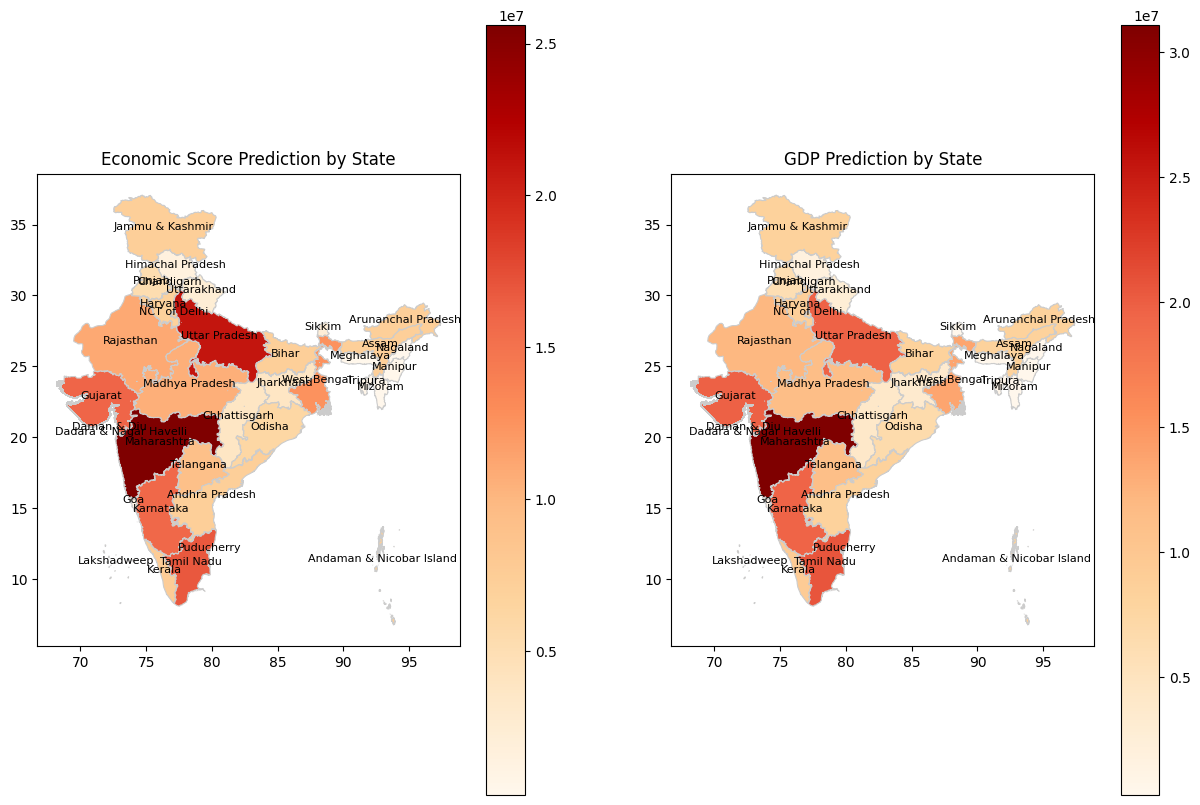

In [ ]:
import matplotlib.pyplot as plt

""" Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
india_map.plot(column='Economic_Score', ax=ax, legend=True,
      cmap='OrRd',  # Choose a color map
      legend_kwds={'label': "Economic Status by State",
                               'orientation': "horizontal"})

plt.title('Economic Status Heatmap of India')
plt.show()
"""

# Create a sample prediction column for demonstration
# india_map['Economic_Score'] = india_map['State'].apply(lambda x: len(x) * 10)  # Example data

# Plot the map with the economic score values as a heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
india_map.plot(column='Economic_Score', cmap='OrRd', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)



# Add state names as labels on the map
for idx, row in india_map.iterrows():
    ax1.text(x=row['geometry'].centroid.x,
                 y=row['geometry'].centroid.y,
                 s=row['State'],
                 fontsize=8,
                 ha='center',
                 color='black')

ax1.set_title('Economic Score Prediction by State')

#Plot the graph with the GDP values as a heatmap

india_map.plot(column='GDP', cmap='OrRd', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)

# Add state names as labels on the map
for idx, row in india_map.iterrows():
    ax2.text(x=row['geometry'].centroid.x,
                 y=row['geometry'].centroid.y,
                 s=row['State'],
                 fontsize=8,
                 ha='center',
                 color='black')

ax2.set_title('GDP Prediction by State')
plt.show()

## Gradiant Boosting

RANDOM FOREST GRIDSEARCH

In [ ]:
"""#X_train = pd.get_dummies(X_train, columns=['State'])

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
model = GradientBoostingRegressor()

# Define the parameter grid with fewer options or a specific range
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
     }

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print(random_search.best_params_)

gbm1 = random_search.best_estimator_
"""

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 424, in fit
    y = column_or_1d(y, warn=True)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1244, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (17, 8) instead.

--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 424, in fit
    y = column_or_1d(y, warn=True)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1244, in column_or_1d
    raise ValueError(
ValueError: y should be a 1d array, got an array of shape (18, 8) instead.


In [ ]:
# Apply one-hot encoding to the 'State' column in X_test
X_test = pd.get_dummies(X_test, columns=['State'])

# Ensure that X_test has the same columns as the training data
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Now you can predict using the modified X_test
gbm_grid_predictions = random_search.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))

MAE: 2221806.7505761287
RMSE: 4278207.641010781
R2_Score:  0.8506943290723863


In [ ]:
fig = px.scatter( x=y_test, y=gbm_grid_predictions,title='Test vs Optimised GBR Prediction')
fig.show()

In [ ]:
print(df.columns)
fig = px.bar(df, x='State', y='Economic_Score',color='GDP',title="Economic Score of multiple States",width=700,height=500)
fig.show()

Index(['State', 'Per Capita Income ', 'Mortality Rate', 'GDP', ' Birth rate',
       'Life Expectancy', 'Population (2024)', 'Literacy Rate',
       'Economic_Score'],
      dtype='object')


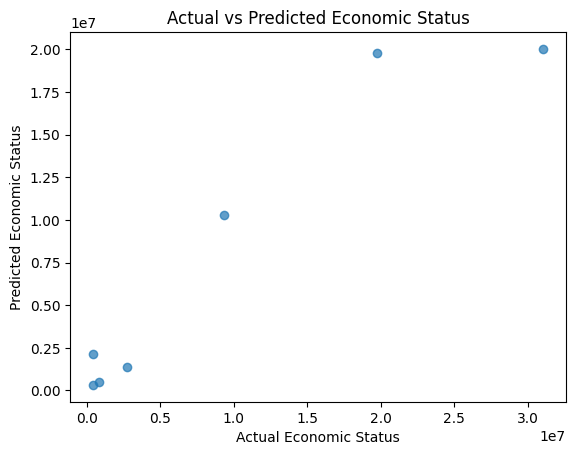

In [ ]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.scatter(y_test, gbm_grid_predictions, alpha=0.7)
plt.xlabel('Actual Economic Status')
plt.ylabel('Predicted Economic Status')
plt.title('Actual vs Predicted Economic Status')
plt.show()